_____________________________________________________________________________________________________________________________________________________________________________________________

Анализ данных

<Axes: >

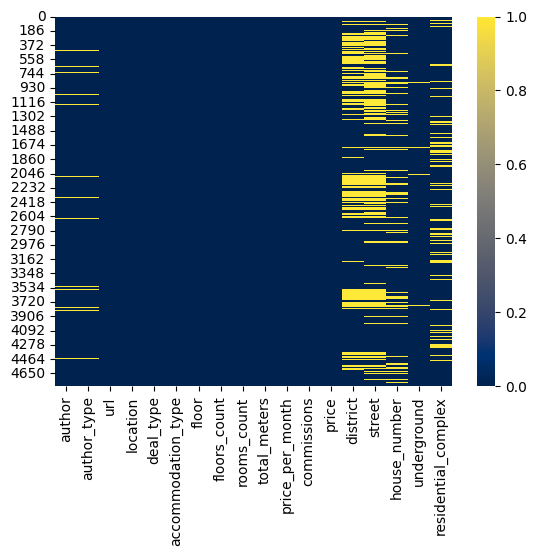

In [3]:
import pandas as pd
import seaborn as sns

path_base = "cian-db.csv"
path_base = 'result.csv'

df = pd.read_csv(path_base)
sns.heatmap(df.isnull(),cmap='cividis')

________________________________________________________________________________________________________________________________________________________________________________________________________

Поиск выбросов

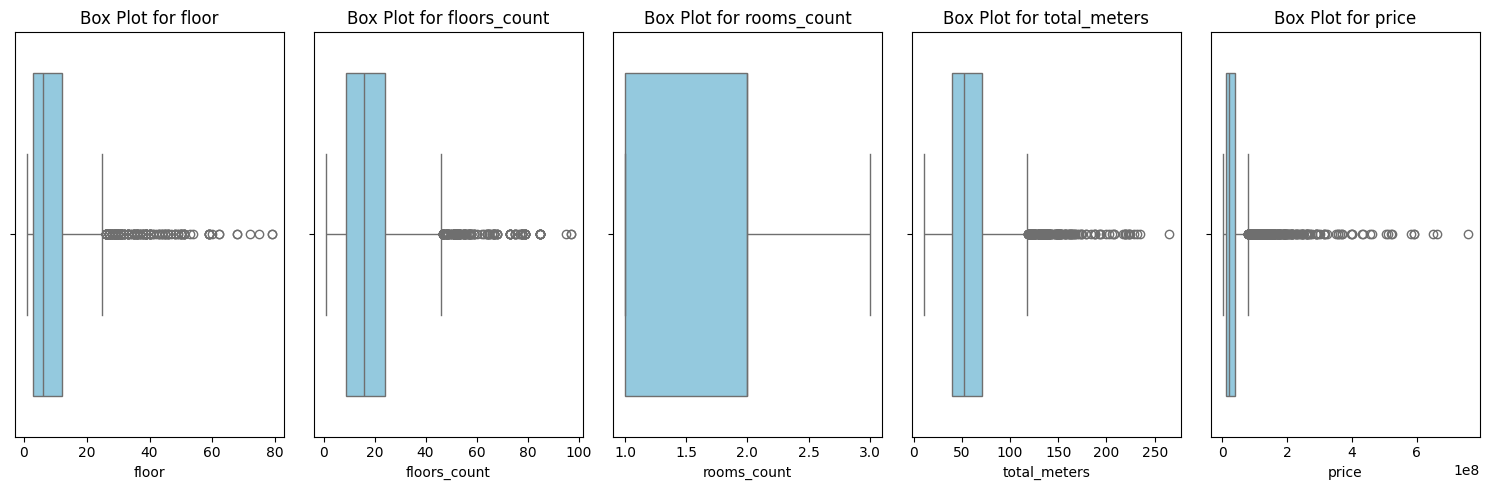

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

path_base = "cian-db.csv"

data = pd.read_csv(path_base)
df_setect_out=df[['floor', 'floors_count', 'rooms_count', 'total_meters', 'price']]
df_setect_out

outlier_cols = []

for column in df_setect_out.columns:
    # Calculate the IQR (Interquartile Range)
    Q1 = df_setect_out[column].quantile(0.25)
    Q3 = df_setect_out[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers based on the IQR
    outliers = (df_setect_out[column] < Q1 - 1.5 * IQR) | (df_setect_out[column] > Q3 + 1.5 * IQR)

    # Check if there are any outliers in the column
    if any(outliers):
        outlier_cols.append(column)

fig, axes = plt.subplots(nrows=1, ncols=len(df_setect_out.columns), figsize=(15, 5))

# Create box plots for each column
for i, column in enumerate(df_setect_out.columns):
    sns.boxplot(x=df_setect_out[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

__________________________________________________________________________________________________________________________________________________________________________________________________



In [5]:

import pandas as pd

path_base = "cian-db.csv"

df = pd.read_csv(path_base)
df.describe()

,rooms_count,total_meters,price,price_per_square
count,3542.000000,3542.000000,3.542000e+03,3.542000e+03
mean,1.843874,60.240426,3.704131e+07,5.040063e+05
std,0.733794,29.836896,5.578745e+07,4.036078e+05
min,1.000000,10.800000,1.400000e+06,4.034580e+04
25%,1.000000,39.900000,1.024925e+07,2.621281e+05
50%,2.000000,52.300000,1.967103e+07,3.935042e+05
75%,2.000000,71.300000,3.764548e+07,5.950804e+05
max,3.000000,264.600000,7.574758e+08,4.741065e+06


In [9]:
import pandas as pd

path_base = "cian-db.csv"
df = pd.read_csv(path_base)

df['author_type'].value_counts()

author_type
real_estate_agent           2307
developer                    820
realtor                      202
homeowner                    104
representative_developer      69
unknown                       28
official_representative       12
Name: count, dtype: int64

C:\Users\Shark\AppData\Local\Temp\ipykernel_13472\4260981116.py:8: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:pink'` for the same effect.

  sns.countplot(x='author_type', hue='price', data=df,  color='pink')


<Axes: xlabel='author_type', ylabel='count'>

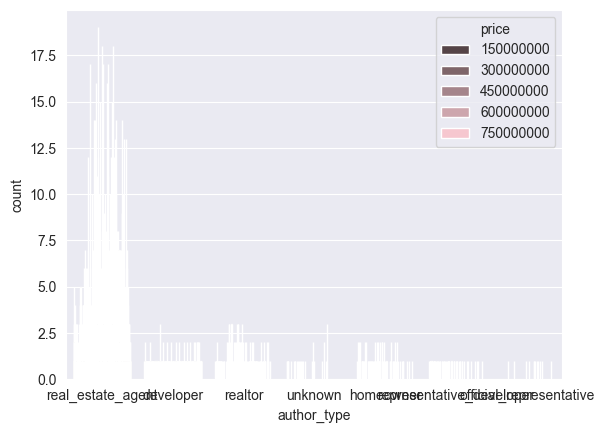

In [11]:
import seaborn as sns

path_base = "cian-db.csv"
df = pd.read_csv(path_base)

df['author_type'].value_counts()
sns.set_style("darkgrid")
sns.countplot(x='author_type', hue='price', data=df,  color='pink') 

array([[<Axes: title={'center': 'author_type'}>,
        <Axes: title={'center': 'rooms_count'}>],
       [<Axes: title={'center': 'total_meters'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'underground'}>,
        <Axes: title={'center': 'price_per_square'}>]], dtype=object)

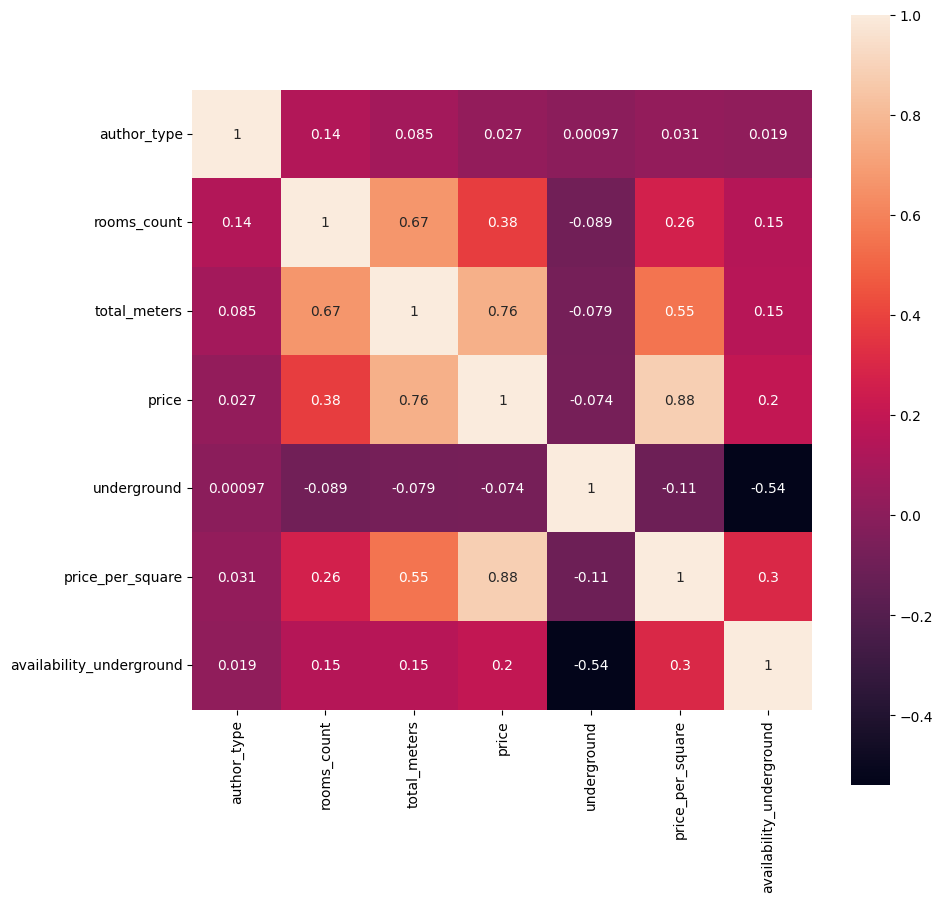

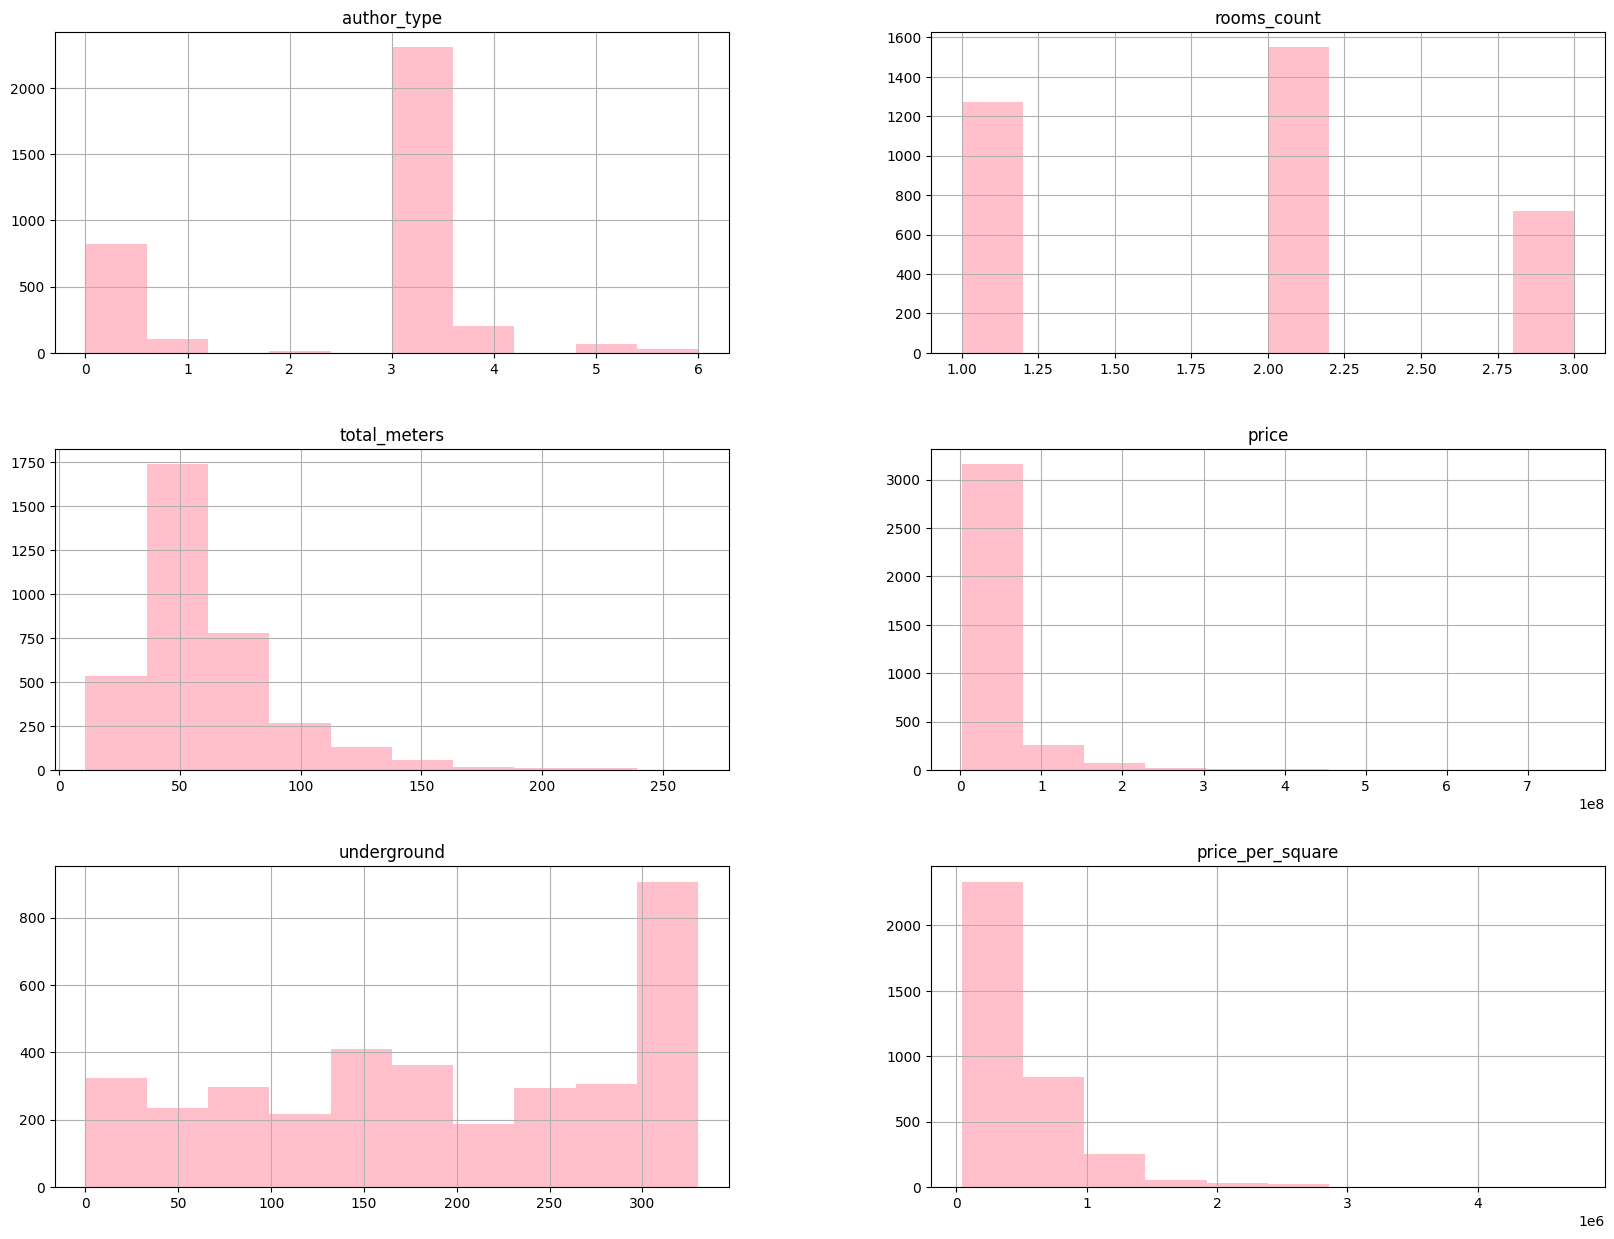

In [18]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#####################################################################################################################

path_base = "cian-db.csv"
df = pd.read_csv(path_base)

#####################################################################################################################

def number_encode_features(init_df):
    result = init_df.copy() #копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() #для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) #применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

plt.subplots(figsize=(10,10))
encoded_data, encoders = number_encode_features(df)
sns.heatmap(encoded_data.corr(), square=True, annot=True)

encoded_data.hist(figsize=(20,15), color='pink') #смотрим на красивые диаграммы

#####################################################################################################################

# died = list(encoded_data[encoded_data['author_type'] == 0][i].dropna()) #создали переменную, которая содержит погибших пассажиров
# survived = list(encoded_data[encoded_data['author_type'] == 1][i].dropna()) #создали еще одну переменную, но уже для выживших
# xmin = min(min(died), min(survived)) #переменная для хранения мин значения
# xmax = max(max(died), max(survived)) #переменная для хранения макс значения
# width = (xmax - xmin) / 20 #настройка ширины
# sns.distplot(survived, color='r', kde=False, bins=np.arange(xmin, xmax, width)) #делаем диаграмку по выжившим пассажирам
# sns.distplot(died, color='b', kde=False, bins=np.arange(xmin, xmax, width)) #делаем  2 диаграмку и накладываем
# plt.legend(['не выжил', 'выжил']) #обозначим цвета
# plt.title('Наложенная гистограмма для колонки {}'.format(i)) #заголовок красивый
# plt.show() #можно заметить, что люди с возрастом 20-30 выжило куда больше, чем погибло, но с детьми иная ситуация

#####################################################################################################################

# for i, col in enumerate(['Pclass', 'SibSp', 'Parch']): #цикл для колонок
#     plt.figure(i)
#     sns.catplot(x=col, y='Survived', data=df, kind='point', aspect=1.5, color='pink') #тут мы видим влияение класса пассажира, количество братьев и сестер, количество родителей и детей на выживаемость